In [8]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
image_size = [224,224]

In [9]:
train ='/content/drive/MyDrive/Basic/car_classification_dataset/basedata/training' 
valid = '/content/drive/MyDrive/Basic/car_classification_dataset/basedata/validation'
test = '/content/drive/MyDrive/Basic/car_classification_dataset/basedata/testing'

**Orignal VGG Modle**

In [10]:
vgg = VGG16()

In [11]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

for our own application model

In [12]:
vgg = VGG16(input_shape=image_size + [3], weights="imagenet", include_top=False)

In [13]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

don't train existing weights

In [14]:
for layer in vgg.layers:
    layer.trainable = False

set number of classes 

In [29]:
folders =glob('/content/drive/MyDrive/Basic/car_classification_dataset/basedata/training/*')
print(folders)

['/content/drive/MyDrive/Basic/car_classification_dataset/basedata/training/jeep', '/content/drive/MyDrive/Basic/car_classification_dataset/basedata/training/car']


now our orignal model have 1000 output while our application have two three or ten

In [30]:
x =Flatten()(vgg.output)

prediction = Dense(len(folders), activation='softmax')(x)
#now concatinate the model in sequence
model = Model(inputs=vgg.input, outputs= prediction)

now concatinate the model in sequence

In [31]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [33]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer= 'adam',
    metrics=['accuracy']
)

set dataset flow

In [34]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale= 1/255)
test_datagen = ImageDataGenerator(rescale= 1/255)


In [38]:
train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Basic/car_classification_dataset/basedata/training',
                                              target_size=(244,244),
                                              batch_size=4,
                                              class_mode='categorical')
valid_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Basic/car_classification_dataset/basedata/validation',
                                              target_size=(244,244),
                                              batch_size=4,
                                              class_mode='categorical')
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Basic/car_classification_dataset/basedata/testing',
                                              target_size=(244,244),
                                              batch_size=4,
                                              class_mode='categorical')

Found 39 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [39]:
result = model.fit_generator(train_set,
                             validation_data= valid_set,
                             epochs =10,
                             steps_per_epoch=len(train_set),
                             validation_steps=len(valid_set))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
10/10 [==============================] - 28s 2s/step - loss: 1.6365 - accuracy: 0.7692 - val_loss: 4.6548 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 1s 148ms/step - loss: 1.9632 - accuracy: 0.6667 - val_loss: 2.8497 - val_accuracy: 0.6000
Epoch 3/10
10/10 [==============================] - 1s 156ms/step - loss: 0.9833 - accuracy: 0.6410 - val_loss: 1.0545 - val_accuracy: 0.6667
Epoch 4/10
10/10 [==============================] - 1s 153ms/step - loss: 0.3871 - accuracy: 0.9231 - val_loss: 0.9862 - val_accuracy: 0.6667
Epoch 5/10
10/10 [==============================] - 1s 147ms/step - loss: 0.1143 - accuracy: 0.9487 - val_loss: 0.5446 - val_accuracy: 0.7000
Epoch 6/10
10/10 [==============================] - 1s 152ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 0.8105 - val_accuracy: 0.7000
Epoch 7/10
10/10 [==============================] - 1s 149ms/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 1.0373 - val_accuracy: 0.6667
Epoch 8/

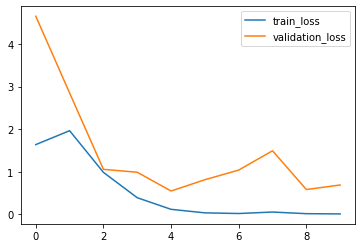

<Figure size 432x288 with 0 Axes>

In [40]:
plt.plot(result.history['loss'], label = 'train_loss')
plt.plot(result.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()
plt.savefig('loss&valid_loss')

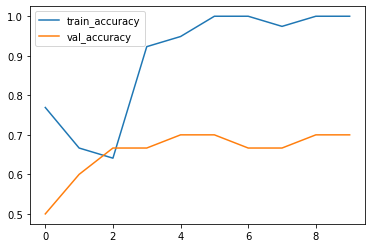

<Figure size 432x288 with 0 Axes>

In [41]:
plt.plot(result.history['accuracy'], label = 'train_accuracy')
plt.plot(result.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.savefig('accuracy&val_accuracy')

In [42]:
import tensorflow as tf

In [43]:
from keras.models import load_model

In [44]:
model.save('/content/drive/MyDrive/Basic/Transfer_learning/car_classification.h5')